# Simple model construction for forecasting consumption

+ Linear Regression:
Mục đích là qua những đặc điểm của dữ liệu để đưa ra một kết quả, 
quan sát có thể biểu diễn mối quan hệ giữa biến phụ thuộc và biến độc lập
 
+ sklearn.linear_model: này dùng để biểu diễn công thức hồi quy tuyến tính sau đó dự đoán kết quả với data test

### Scikit-learn (Sklearn) 
là thư viện mạnh mẽ nhất dành cho các thuật toán học máy được viết trên ngôn ngữ Python. Thư viện cung cấp một tập các công cụ xử lý các bài toán machine learning và statistical modeling gồm: classification, regression, clustering, và dimensionality reduction.

### Các thuộc tính của Class Linear Regression

coef: Trả về hệ số hồi quy
    
intercept: Trả về sai số
    
fit(X, y[, sample_weight]): Tiến hành tìm phương trình hồi quy tuyến tính

get_params([deep]): Lấy parameter đã sử dụng

predict(X): Sử dụng model vừa tạo được tiến hành dự đoán

score(X, y[, sample_weight]): Đưa ra hệ số quyết định R2.Không phải lúc nào giá trị dự đoán cũng giống vs giá trị thực tế. Hệ số quyết định ~ 1 thì độ chính xác càng cao, ~ 0 thì sai lệch lớn

### Phương trình hồi quy
Y=aX1 + bX2 + CX3 ..... + e
 
+ X1,X2...:biến độc lập
+ a,b,c...: Hệ số hồi quy
+ e: sai số ngẫu nhiên

### Biến độc lập
Có hai loại biến là định tính và định lượng

Đối với biến định tính thì cần gán giá trị cho biến

### Giải thích ý nghĩa của các hệ số
+ (a,b,c) khi X tăng hoặc giảm 1 đơn vị, trong điều kiện các biến độc lập khác không đổi, thì Y trung bình sẽ thay
đổi 1 lượng a đơn vị.
+ e Sai số ngẫu nhiên thể hiện ảnh hưởng của các yếu tố khách đến biến phụ thuộc

### Cách đọc kết quả của mô hình hồi quy với các transformation thường gặp

+ TH1: Chỉ có biến phụ thuộc được Log- transformation =>
     trường hợp 1 giả sử model mình tìm ra là y= 2x thì khi x tăng lên 1 đơn vị y sẽ tăng lên 200%

+ TH2: Chỉ có log-transform với biến x, biến Y không =>
     Ta chia hệ số cho 100. Nó cho biết rằng mức tăng 1% trong biến độc lập sẽ tăng (hoặc giảm) biến phụ thuộc theo đơn vị (hệ số / 100).
Ví dụ: hệ số là 0,198 thì 0,198 / 100 = 0,00198. Cứ tăng 1% trong biến độc lập, biến phụ thuộc của chúng ta tăng khoảng 0,002 đơn vị

+ TH3: Cả biến Y và x đều log-transform =>
     thì trường hợp này hệ số sẽ thể hiện mức tăng % của y khi tăng 1% của x
ví dụ: hệ số là 0,198. Cứ tăng 1% trong biến độc lập, biến phụ thuộc tăng 0,198%


### Ý nghĩa của hệ số xác định
R^2 là tỷ lệ sự thay đổi của biến phụ thuộc được giải thích bởi các biến độc lập trong mô hình

R lớn hơn cho thấy sự phù hợp lớn hơn, có thể giải thích tốt hơn sự biến đổi của đầu ra với các đầu vào

R^2=1: nghĩa là hoàn toàn phù hợp vì giá trị của câu trả lời được dự đoán và thực thế hoàn toàn khớp nhau

### Đánh giá hiệu suất của mô hình
Có 3 thước đo chính để đánh giá mô hình trong hồi quy
1. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
2. R Square/Adjusted R Square
3. Mean Absolute Error(MAE)

In [2]:
import sqlalchemy
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
clf = linear_model.LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [40]:
histories = pd.read_csv('do dung gia dinh.csv')

In [41]:
histories.head(1000)

,Unnamed: 0,Name category_x,from_date,Date_x,sold,len_name_x,len_description_x,price_max_before_discount_x,price_min_before_discount_x,price_max_x,price_min_x,price_x,price_before_discount_x,store_fans_trungbinh_x,cmt_count_trungbinh_x,so_shop_x,discount_trungbinh_x,review_positive_rate_x,review_score_in_average_x,number_of_product_in_store_x
0,30,Khong xac dinh,2021-01-22,2021-02-21,4447.0,50.586538,738.115385,22803.076917,19719.423071,51789.307692,43187.288462,43187.288462,19719.423077,27294.519231,221.625000,86,10.605769,0.968404,4.869596,602.048077
1,31,Khong xac dinh,2021-01-23,2021-02-22,4447.0,50.586538,738.115385,22803.076917,19719.423071,51789.307692,43187.288462,43187.288462,19719.423077,27294.519231,221.625000,86,10.605769,0.968404,4.869596,602.048077
2,32,Khong xac dinh,2021-01-24,2021-02-23,4447.0,50.586538,738.115385,22803.076917,19719.423071,51789.307692,43187.288462,43187.288462,19719.423077,27294.519231,221.625000,86,10.605769,0.968404,4.869596,602.048077
3,33,Khong xac dinh,2021-01-25,2021-02-24,3998.0,50.586538,738.115385,22803.076917,19719.423071,51789.307692,43187.288462,43187.288462,19719.423077,27294.519231,221.625000,86,10.605769,0.968404,4.869596,602.048077
4,34,Khong xac dinh,2021-01-26,2021-02-25,3715.0,50.586538,738.115385,22803.076917,19719.423071,51789.307692,43187.288462,43187.288462,19719.423077,27294.519231,221.625000,86,10.605769,0.968404,4.869596,602.048077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3995,nút bịt tai cách âm chống ồn chiếc,2021-01-27,2021-02-26,157.0,50.285714,484.714286,1714.285707,857.142850,2871.428571,2157.142857,2157.142857,857.142857,33612.571429,297.142857,5,7.714286,0.972586,4.883073,551.714286
996,3996,nút bịt tai cách âm chống ồn chiếc,2021-01-28,2021-02-27,157.0,50.285714,484.714286,1714.285707,857.142850,2871.428571,2157.142857,2157.142857,857.142857,33612.571429,297.142857,5,7.714286,0.972586,4.883073,551.714286
997,3997,nút bịt tai cách âm chống ồn chiếc,2021-01-29,2021-02-28,138.0,50.285714,484.714286,1714.285707,857.142850,2871.428571,2157.142857,2157.142857,857.142857,33612.571429,297.142857,5,7.714286,0.972586,4.883073,551.714286
998,3998,nút bịt tai cách âm chống ồn chiếc,2021-01-30,2021-03-01,122.0,50.285714,484.714286,1714.285707,857.142850,2871.428571,2157.142857,2157.142857,857.142857,33612.571429,297.142857,5,7.714286,0.972586,4.883073,551.714286


In [42]:
histories=histories.replace(np.nan, 0)

In [43]:
histories.dtypes

Unnamed: 0                        int64
Name category_x                  object
from_date                        object
Date_x                           object
sold                            float64
len_name_x                      float64
len_description_x               float64
price_max_before_discount_x     float64
price_min_before_discount_x     float64
price_max_x                     float64
price_min_x                     float64
price_x                         float64
price_before_discount_x         float64
store_fans_trungbinh_x          float64
cmt_count_trungbinh_x           float64
so_shop_x                         int64
discount_trungbinh_x            float64
review_positive_rate_x          float64
review_score_in_average_x       float64
number_of_product_in_store_x    float64
dtype: object

In [61]:
X = histories.drop(['Name category_x','from_date','Date_x','sold'],axis=1)
Y = histories[['sold']]

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [104]:
df = X, Y = data[:, :-1], data[:, -1]

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.1)

# Linear Regression

In [106]:
clf=clf.fit(X_train, Y_train)

In [107]:
Y_pred=clf.predict(X_test)

In [108]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score",r2_score(Y_test,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 score 0.6064770846224884
RMSE 5.013149254757754


## Hiệu chỉnh mô hình với Rigde và Lasso

Trước tiên sẽ tìm hiểu về hai khái niệm Bias và Variance:
+ Bias là sai lệch giữa giá trị dự đoán và giá trị chính xác của bộ dữ liệu. Mô hình bị Bias đồng nghĩa với việc nó đơn giản hóa và có sự sai lệch cao trong cả tập train và test.    

+ Variance: là mô hình tập trung vào việc giải thích sự phân bố của các data point được cho trước nên thường có hiệu quả rất tốt đối với tập train nhưng rất tệ với tập test.

==> Từ đó gây ra hai hiện tượng là Over Fitting và Under Fitting

+ Under Fitting (High Bias): là mô hình bị đơn giản hóa nên có sự sai lệch cao cả ở tập train và tập test

+ Over fitting (High Variance): là mô hình có hiệu quả tốt với tập train nhưng lại không có hiệu quả với tập test


### Bias và variance có mối quan hệ đánh đổi??

Vì nếu mô hình quá đơn giản, khi đó nó sẽ gặp vấn đề bias lớn và variance thấp. Mặt khác, nếu model có một lượng lớn tham số thì nó sẽ có variance lớn và bias nhỏ. Do đó, chúng ta cần tìm ra điểm tối ưu mà cân bằng được 2 đại lượng này, tránh việc xảy ra overfitting hay underfitting.


### Khi nào thì sử dụng Rigde, Lasso?
==> Rigde và Lasso là một số kỹ thuật đơn giản để giảm độ phức tạp của mô hình và ngăn chặn quá phù hợp có thể dẫn đến hồi quy tuyến tính đơn giản. Cả hai đều dùng để giảm overfit vì nó sẽ điều chỉnh độ lớn của các hệ số, giúp cho mô hình có bộ tham số nhỏ, giảm phức tạp và không bị biến động mạnh hay nhạy cảm với các outlier của dữ liệu. Tuy nhiên Lasso còn dùng để feature selection, Rigde dùng để làm giảm các hệ số gần về 0 

### Làm thế nào để biết được mô hình đang gặp phải vấn đề nào? Bias hay Variance?

#### 1.Installing mlxtend
pip install mlxtend 

In [109]:
#### 2.Import thư viện mlxtend
from mlxtend.evaluate import bias_variance_decomp

In [110]:
###bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='0-1_loss', num_rounds=200, random_seed=None, fit_params)
mse, bias, var = bias_variance_decomp(clf, X_train, Y_train, X_test, Y_test, loss='mse', num_rounds=2000)

+ loss : str (default='0-1_loss'): Hàm mất mát để thực hiện phân tích phương sai sai lệch. Các giá trị được phép hiện tại là '0-1_loss' và 'mse'.

+ num_rounds : int (default=200): Số vòng khởi động để thực hiện phân rã phương sai lệch.

+ random_seed : int (default=None): Lấy mẫu ngẫu nhiên được sử dụng để phân tích phương sai chệch.

+ fit_params : additional parameters: Các tham số bổ sung sẽ được chuyển tới hàm .fit () của công cụ ước tính khi nó phù hợp với các mẫu 


In [111]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 26.095
Bias: 25.223
Variance: 0.872


#### Đọc kết quả
+ Mô hình có độ chệch cao và phương sai thấp đúng với mong đợi
+ Tổng của giá trị trung bình và phương sai ước tính bằng với sai số ước tính của mô hình ( Bias + Variance = MSE)

### Giả sử mô hình xảy ra hiện tượng Over Fitting và Under Fitting => sử dụng Rigde và Lasso giảm overfit 

# Rigde Regression



In [112]:
# Khởi tạo mô hình hồi quy Ridge với giá trị alpha là 0,01.
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.001)

In [129]:
# Chọn mô hình phù hợp
R=R.fit(X_train,Y_train)

In [130]:
# Dự báo
Y_pred=R.predict(X_test)

In [131]:
# In các số liệu đánh giá - RMSE và R-bình phương 
print("R2 score",r2_score(Y_test,Y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 score 0.6064679726057367
RMSE 5.013207294116806


# Lasso Regression

In [116]:
from sklearn.linear_model import Lasso

In [117]:
# Khởi tạo mô hình hồi quy Lasso với giá trị alpha là 0,01.
model_lasso = Lasso(alpha=0.01)

In [136]:
# Chọn mô hình phù hợp
L=model_lasso.fit(X_train, Y_train)

In [137]:
# Dự báo
pred_train_lasso= model_lasso.predict(X_train)

In [138]:
print("R2 score",r2_score(Y_train, pred_train_lasso))
print("RMSE",np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))

R2 score 0.7501606322695434
RMSE 4.649830113322666


# Visualization

#### 1. Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError, ResidualsPlot

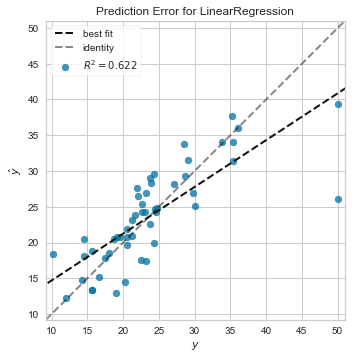

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [142]:
df = PredictionError(clf)
df.fit(X_train, Y_train)  
df.score(X_test, Y_test)  
df.poof()

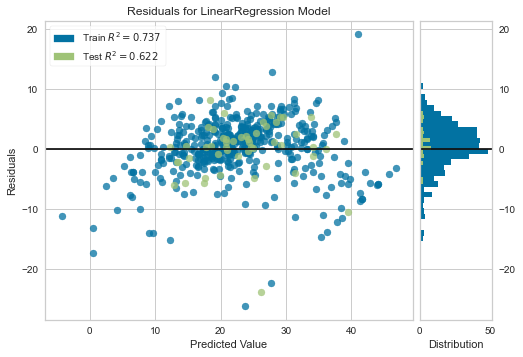

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [143]:
df = ResidualsPlot(clf)
df.fit(X_train, Y_train)  
df.score(X_test, Y_test)  
df.poof()

#### 2. Ridge Regression

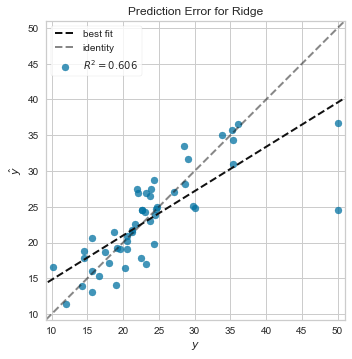

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [144]:
df = PredictionError(R)
df.fit(X_train, Y_train)  
df.score(X_test, Y_test)  
df.poof()

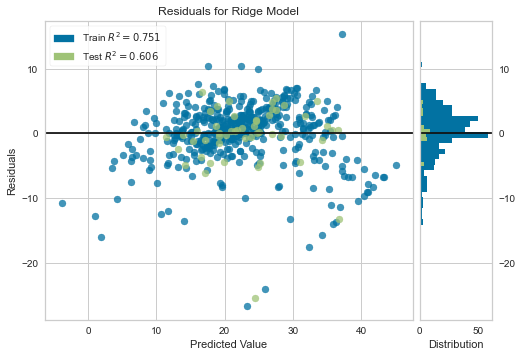

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [145]:
df = ResidualsPlot(R)
df.fit(X_train, Y_train)  
df.score(X_test, Y_test)  
df.poof()

#### 3. Lasso Regression

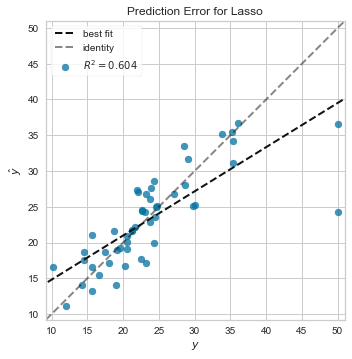

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [146]:
df = PredictionError(L)
df.fit(X_train, Y_train)  
df.score(X_test, Y_test)  
df.poof()

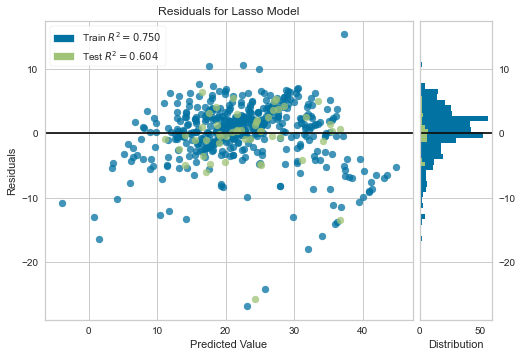

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [147]:
df = ResidualsPlot(L)
df.fit(X_train, Y_train)  
df.score(X_test, Y_test)  
df.poof()